##**SHETH L.U.J. COLLEGE OF ARTS & SIR M.V. COLLEGE OF SCIENCE & COMMERCE**

**Aim: Naive Bayes' Classifier**

* Implement the Naive Bayes' algorithm for classification.
* Train a Naive Bayes' model using a given dataset and calculate class
probabilities.
* Evaluate the accuracy of the model on test data and analyze the results.

### **Bhumika Shelar | T114**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

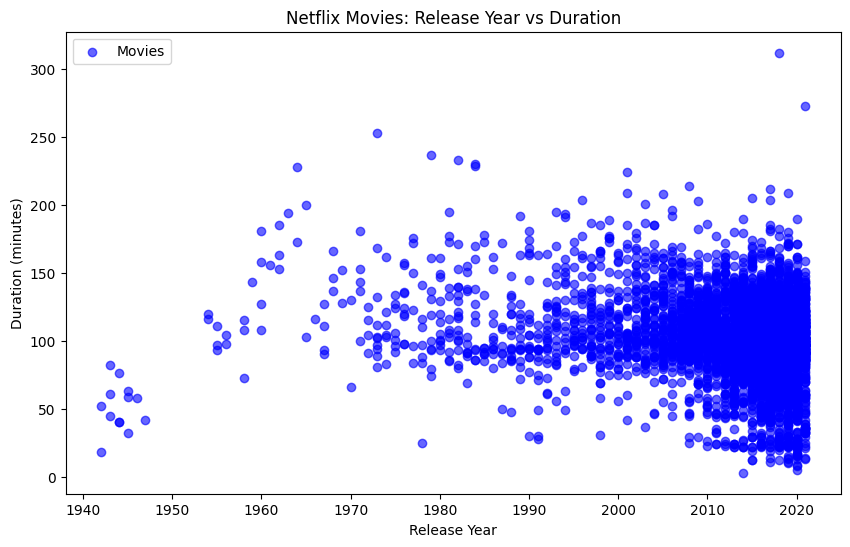

In [ ]:
df_movies = df[df["type"] == "Movie"].copy()
df_movies["duration_minutes"] = df_movies["duration"].str.replace(" min", "").astype(float)
plt.figure(figsize=(10,6))
plt.scatter(df_movies["release_year"], df_movies["duration_minutes"],
            color="blue", alpha=0.6, label="Movies")

plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")
plt.title("Netflix Movies: Release Year vs Duration")
plt.legend()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df["duration_num"] = df["duration"].str.extract(r'(\d+)').astype(float)

In [ ]:
# Define X (features) and y (target)
X = df.drop('type', axis=1)
y = df['type']

In [ ]:
# Convert all columns to string and apply Label Encoding
X = X.apply(lambda col: LabelEncoder().fit_transform(col.astype(str)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [ ]:
# Train Naive Bayes Classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate performance
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8690881573968975

Classification Report:
               precision    recall  f1-score   support

       Movie       0.93      0.88      0.90      1836
     TV Show       0.75      0.85      0.80       807

    accuracy                           0.87      2643
   macro avg       0.84      0.86      0.85      2643
weighted avg       0.88      0.87      0.87      2643


Confusion Matrix:
 [[1613  223]
 [ 123  684]]


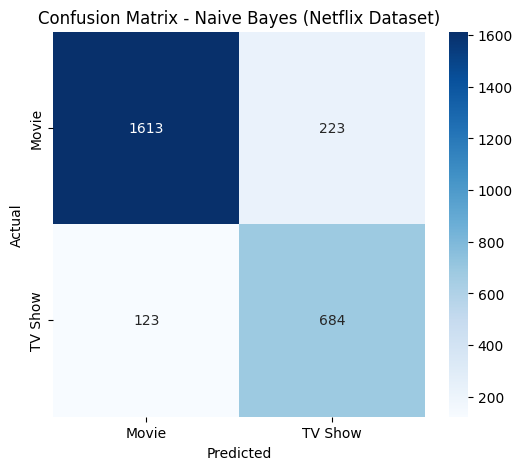

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Movie", "TV Show"],
            yticklabels=["Movie", "TV Show"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Netflix Dataset)")
plt.show()